In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, SimpleRNN, Input, Embedding, Flatten, LSTM
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

df = pd.read_csv('rnn_data.tsv', sep='\t', header=None)

#get column indices 1 and 3 for relevant data (1=label, 3=data)
labels = df.iloc[:, 1]
texts = df.iloc[:, 3]

X_train, X_val, y_train, y_val = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

#shape = 6840 for training, 1711 for validation
print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"training shape {X_train.shape}")
print(f"val shape {X_val.shape}")



Training samples: 6840
Validation samples: 1711
training shape (6840,)
val shape (1711,)


Epoch 1/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.6901 - loss: 0.6285 - val_accuracy: 0.7032 - val_loss: 0.6112
Epoch 2/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7134 - loss: 0.6062 - val_accuracy: 0.7032 - val_loss: 0.6081
Epoch 3/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7034 - loss: 0.6139 - val_accuracy: 0.7032 - val_loss: 0.6080
Epoch 4/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7025 - loss: 0.6121 - val_accuracy: 0.7032 - val_loss: 0.6088
Epoch 5/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.7132 - loss: 0.6051 - val_accuracy: 0.7032 - val_loss: 0.6146
Epoch 6/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6984 - loss: 0.6152 - val_accuracy: 0.7032 - val_loss: 0.6040
Epoch 7/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7301 - loss: 0.5341 - val_accuracy: 0.5899 - val_loss: 0.6539
Epoch 8/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.7785 - loss: 0.4703 - val_acc

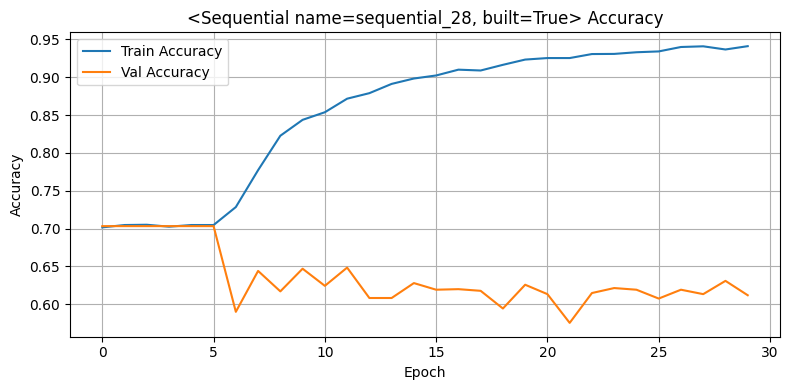

In [ ]:
#map words to integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
x_train_tokenized = tokenizer.texts_to_sequences(X_train)
x_train_pad = pad_sequences(x_train_tokenized, padding='post')
x_train_embedded = len(tokenizer.word_index) + 1
max_len = x_train_pad.shape[1]

model = Sequential([
    Embedding(input_dim=x_train_embedded, output_dim=64),
    LSTM(128, dropout=0.4, recurrent_dropout=0.4),  # Remove SimpleRNN layer
    Dense(64, activation='relu'),
    Dropout(0.6),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0015), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_pad, y_train, validation_split=0.2,epochs=30, batch_size=32)


#tokenize and padd evaluation data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_val)
x_val_tokenized = tokenizer.texts_to_sequences(X_val)
x_val_pad = pad_sequences(x_val_tokenized, padding='post')
loss, accuracy = model.evaluate(x_val_pad, y_val)
print(f"Accuracy: {accuracy} \t Loss: {loss}")

plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title(f'{model} Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
